In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

In [1]:
import datetime
pd.to_datetime(datetime.datetime.now())

NameError: name 'pd' is not defined

# To get the data from Alpha Vantage site

In [2]:
import requests
import json

function='TIME_SERIES_WEEKLY'
symbol='MSFT' # Get symbols from yahoo finance
apikey='demo' # Use your API key rather than 'demo' 

response = requests.get('https://www.alphavantage.co/query?function={}&symbol={}&apikey={}'.format(function, symbol, apikey))

In [3]:
result = response.json()

In [4]:
result.keys()

dict_keys(['Meta Data', 'Weekly Time Series'])

In [5]:
result['Meta Data']

{'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2018-04-19',
 '4. Time Zone': 'US/Eastern'}

In [6]:
msft = pd.DataFrame(result['Weekly Time Series']).T

In [7]:
msft = msft.astype(float)
msft = msft.dropna()
msft = msft[msft['4. close'] != 0]

In [8]:
msft.head()

,1. open,2. high,3. low,4. close,5. volume
2000-01-14,113.44,114.25,101.50,112.25,157400000.0
2000-01-21,111.81,116.50,103.25,103.75,151908900.0
2000-01-28,103.80,105.69,97.25,98.25,147333000.0
2000-02-04,97.62,108.00,94.87,106.56,148928900.0
2000-02-11,106.81,110.00,99.12,99.94,160705800.0


In [9]:
msft.tail()

,1. open,2. high,3. low,4. close,5. volume
2018-03-23,93.74,94.050,87.08,87.18,157031195.0
2018-03-29,90.61,95.139,88.40,91.27,207104405.0
2018-04-06,90.47,93.065,87.51,90.23,189087091.0
2018-04-13,91.04,94.180,90.62,93.08,133450878.0
2018-04-19,94.07,97.070,93.42,96.11,91642892.0


In [10]:
msft.describe()

,1. open,2. high,3. low,4. close,5. volume
count,954.000000,954.000000,954.000000,954.000000,9.540000e+02
mean,40.405656,41.552214,39.306412,40.457346,2.470593e+08
std,18.759618,19.413272,18.041585,18.775087,1.134614e+08
min,15.200000,16.400000,14.870000,15.280000,4.223590e+07
25%,26.725000,27.242500,26.100000,26.660000,1.624329e+08
50%,30.325050,31.000000,29.755000,30.434900,2.327805e+08
75%,52.815000,54.892500,50.895000,52.800000,3.089965e+08
max,113.440000,116.500000,103.250000,112.250000,8.797232e+08


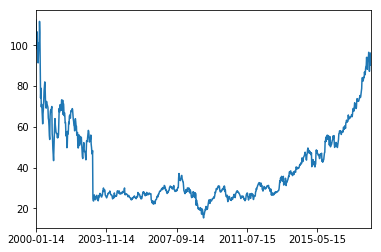

In [11]:
msft['4. close'].plot()